# Accuracy Vs. Refinement strength (Lambda)
Recreate figure 2 A - 
Accuracy rate for different refinement strengths \lambda

In [11]:
import os
print(os.getcwd()) #print working dir
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time

from importlib import reload
os.sys.path.insert(0, '../src/')
import analyze_utilities
reload(analyze_utilities)

%run ./result_summary.ipynb

output_path = '../results/figures'
is_plot_title = False
is_save_fig = True

# print(plt.style.available)
# print(plt.rcParams)
plt.style.use(['seaborn-darkgrid', 'seaborn-paper'])
label_size = 18
tick_size = 14
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=label_size)
plt.rc('axes', labelsize=label_size)
plt.rc('xtick', labelsize=tick_size)
plt.rc('ytick', labelsize=tick_size)

C:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml\notebooks
Loading paths from result_summary.ipynb


In [7]:
cifar_pgd_natural_diff_refinement = './../results/paper/cifar_adv_diff_fix_natural'
cifar_natural_natural_diff_refinement = './../results/paper/cifar_diff_fix_natural'
cifar_pgd_pgd_diff_refinement = './../results/paper/cifar_adv_diff_fix'
cifar_natural_pgd_diff_refinement = './../results/paper/cifar_diff_fix'

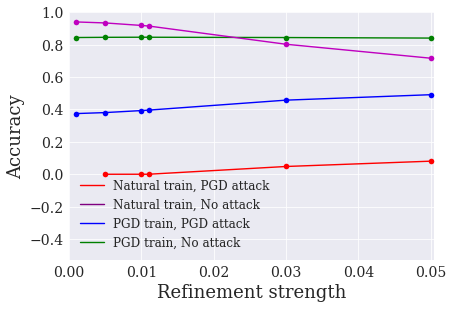

In [13]:
# results for pgd trained and natural trained models for different refinement strength (lambda [0, 0.05]):
# Names are formulated the following way cifar_{train type}_{attack_type}_df
cifar_pgd_natural_df, _ = analyze_utilities.create_nml_vs_eps_df(cifar_pgd_natural_diff_refinement)
cifar_natural_natural_df, _ = analyze_utilities.create_nml_vs_eps_df(cifar_natural_natural_diff_refinement)
cifar_natural_pgd_df, _= analyze_utilities.create_nml_vs_eps_df((cifar_natural_pgd_diff_refinement))
cifar_pgd_pgd_df, _ = analyze_utilities.create_nml_vs_eps_df(cifar_pgd_pgd_diff_refinement)


axes = plt.gca()
axes.set_xlim([0.0, 0.0505])
axes.set_ylim([-0.53, 1.0])
l1 = plt.plot(cifar_pgd_natural_df['eps'],cifar_pgd_natural_df['acc'], 'go-')
l2 = plt.plot(cifar_natural_natural_df['eps'],cifar_natural_natural_df['acc'], 'mo-')
l3 = plt.plot(cifar_natural_pgd_df['eps'],cifar_natural_pgd_df['acc'], 'ro-')
l4 = plt.plot(cifar_pgd_pgd_df['eps'],cifar_pgd_pgd_df['acc'], 'bo-')

plt.xlabel('Refinement strength')
plt.ylabel('Accuracy')
green_line = mlines.Line2D([], [], color='green', markersize=15, label='PGD train, No attack')
purple_line = mlines.Line2D([], [], color='purple', markersize=15, label='Natural train, No attack')
red_line = mlines.Line2D([], [], color='red', markersize=15, label='Natural train, PGD attack')
blue_line = mlines.Line2D([], [], color='blue', markersize=15, label='PGD train, PGD attack')
plt.legend(handles=[red_line, purple_line, blue_line, green_line], fontsize=12, ncol=1, loc=3)

plt.savefig(os.path.join(output_path, 'fig_cifar_acc_vs_refinement_strength.pdf'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()
